In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\User\Downloads\Test-core-Dataset.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,completed,77,81,78
1,female,group B,some high school,free/reduced,completed,37,49,46
2,male,group A,some college,free/reduced,completed,32,37,41
3,male,group B,bachelor's degree,standard,completed,88,87,80
4,female,group C,high school,standard,completed,92,92,93


In [4]:
list(df)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.584000,70.249000,69.128000
std,15.375414,14.684162,15.242242
min,16.000000,18.000000,16.000000
25%,57.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,79.000000,80.250000,80.000000
max,100.000000,100.000000,100.000000


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

dfnum=df

In [7]:
df.gender.value_counts()


female    516
male      484
Name: gender, dtype: int64

dfnum['gender']=dfnum['gender'].replace(['female','male'],[0,1])

In [8]:
df['race/ethnicity'].value_counts()

group C    309
group D    277
group B    201
group E    139
group A     74
Name: race/ethnicity, dtype: int64

x=list(set(df['race/ethnicity'].values))
df['race/ethnicity']=df['race/ethnicity'].replace(x,[0,1,2,3,4])

In [9]:
df['parental level of education'].value_counts()

associate's degree    209
some college          203
high school           198
some high school      191
bachelor's degree     126
master's degree        73
Name: parental level of education, dtype: int64

x=list(set(df['parental level of education'].values))
df['parental level of education']=df['parental level of education'].replace(x,[0,1,2,3,4,5])

In [10]:
df['lunch'].value_counts()

standard        653
free/reduced    347
Name: lunch, dtype: int64

x=list(set(df['lunch'].values))
df['lunch']=df['lunch'].replace(x,[0,1])

In [11]:
df['test preparation course'].value_counts()

none         666
completed    334
Name: test preparation course, dtype: int64

x=list(set(df['test preparation course'].values))
df['test preparation course']=df['test preparation course'].replace(x,[0,1])

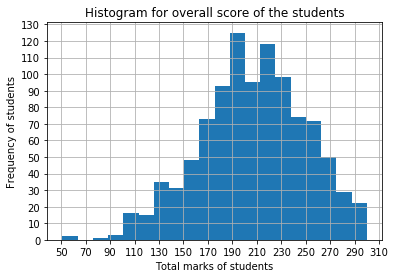

In [12]:
#2.Draw a histogram for overall score of the stidents
plt.hist(df['math score']+df['reading score']+df['writing score'],bins=20)
plt.title('Histogram for overall score of the students')
plt.ylabel('Frequency of students')
plt.xticks(np.arange(50, 320, step=20))
plt.yticks(np.arange(0, 140, step=10))
plt.xlabel('Total marks of students')
plt.grid(True)
plt.show()

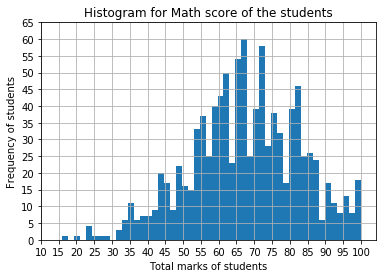

In [13]:
#3.Draw a histogram for overall score of the stidents
#a Maths
plt.hist(df['math score'],bins=50)
plt.title('Histogram for Math score of the students')
plt.xticks(np.arange(10, 105, step=5))
plt.yticks(np.arange(0, 70, step=5))
plt.ylabel('Frequency of students')
plt.xlabel('Total marks of students')
plt.grid(True)
plt.show()

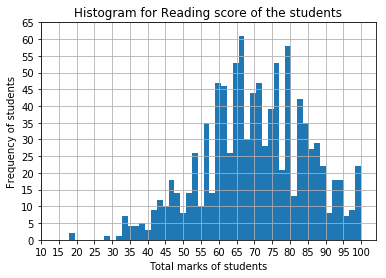

In [14]:
#b Reading
plt.hist(df['reading score'],bins=50)
plt.title('Histogram for Reading score of the students')
plt.xticks(np.arange(10, 105, step=5))
plt.yticks(np.arange(0, 70, step=5))
plt.ylabel('Frequency of students')
plt.xlabel('Total marks of students')
plt.grid(True)
plt.show()

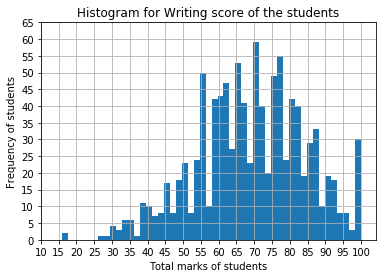

In [15]:
#c Reading
plt.hist(df['writing score'],bins=50)
plt.title('Histogram for Writing score of the students')
plt.xticks(np.arange(10, 105, step=5))
plt.yticks(np.arange(0, 70, step=5))
plt.ylabel('Frequency of students')
plt.xlabel('Total marks of students')
plt.grid(True)
plt.show()

In [16]:
#4.What is the summary statistics (mean, median, mode, standard deviation, Q1, Q2,Q3) for each gender
import statistics as st
df['overall']=df.sum(axis=1)
print('Mean')
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].mean().T)
print('\nMedian')
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].median().T)
print('\nStandard Deviation')
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].std().T)

Mean
gender             female        male
math score      65.073643   70.260331
reading score   73.507752   66.774793
writing score   73.337209   64.640496
overall        211.918605  201.675620

Median
gender         female   male
math score       65.0   70.5
reading score    74.0   66.0
writing score    74.0   65.0
overall         213.0  200.0

Standard Deviation
gender            female       male
math score     14.948143  15.388226
reading score  13.767767  14.846938
writing score  14.019080  15.227022
overall        41.471304  44.339787


In [17]:
print('Mode:\nFemale:\n',(df.loc[df['gender']=='female']).mode().T[0][5:9])
print('\nMale:\n',(df.loc[df['gender']=='male']).mode().T[0][5:9])

Mode:
Female:
 math score        63
reading score     77
writing score     71
overall          200
Name: 0, dtype: object

Male:
 math score        72
reading score     66
writing score     56
overall          175
Name: 0, dtype: object


In [18]:
print('Q1 Q2 Q3:')
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][4:7])
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][12:15])
print(df.groupby('gender')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][20:23])

Q1 Q2 Q3:
gender          female  male
math score 25%    55.0  60.0
           50%    65.0  70.5
           75%    75.0  82.0
gender             female  male
reading score 25%   65.00  58.0
              50%   74.00  66.0
              75%   83.25  78.0
gender             female  male
writing score 25%    64.0  55.0
              50%    74.0  65.0
              75%    83.0  76.0


In [19]:
#5.What is the summary statistics (mean, median, mode, standard deviation, Q1, Q2,Q3) for each race
print('Mean')
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].mean().T)
print('\nMedian')
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].median().T)
print('\nStandard Deviation')
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].std().T)

Mean
race/ethnicity     group A     group B     group C     group D     group E
math score       66.770270   65.980100   65.699029   66.880866   75.928058
reading score    67.108108   69.706468   69.786408   69.678700   74.870504
writing score    65.675676   68.383085   68.145631   69.552347   73.381295
overall         199.554054  204.069652  203.631068  206.111913  224.179856

Median
race/ethnicity  group A  group B  group C  group D  group E
math score         67.5     66.0     67.0     68.0     77.0
reading score      67.5     69.0     69.0     72.0     74.0
writing score      65.0     70.0     69.0     71.0     73.0
overall           201.5    204.0    201.0    212.0    223.0

Standard Deviation
race/ethnicity    group A    group B    group C    group D    group E
math score      14.715147  15.031287  14.811040  15.618768  14.446122
reading score   14.330318  14.484419  14.272385  14.944875  14.783380
writing score   14.948412  14.546048  14.913653  15.669653  15.542087
overall     

In [20]:
print('Mode:')
print('Group A\n',df.loc[df['race/ethnicity']=="group A"].mode().T[0][5:9])
print('\nGroup B\n',df.loc[df['race/ethnicity']=="group B"].mode().T[0][5:9])
print('\nGroup C\n',df.loc[df['race/ethnicity']=="group C"].mode().T[0][5:9])
print('\nGroup D\n',df.loc[df['race/ethnicity']=="group D"].mode().T[0][5:9])
print('\nGroup E\n',df.loc[df['race/ethnicity']=="group E"].mode().T[0][5:9])

Mode:
Group A
 math score        59
reading score     62
writing score     56
overall          185
Name: 0, dtype: object

Group B
 math score        62
reading score     66
writing score     77
overall          195
Name: 0, dtype: object

Group C
 math score        57
reading score     65
writing score     55
overall          186
Name: 0, dtype: object

Group D
 math score        65
reading score     73
writing score     78
overall          222
Name: 0, dtype: object

Group E
 math score       100
reading score     64
writing score    100
overall          300
Name: 0, dtype: object


In [21]:
print('Q1 Q2 Q3:')
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][4:7])
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][12:15])
print(df.groupby('race/ethnicity')[['math score']+['reading score']+['writing score']+['overall']].describe().T[:][20:23])

Q1 Q2 Q3:
race/ethnicity  group A  group B  group C  group D  group E
math score 25%    57.25     57.0     57.0     56.0     65.5
           50%    67.50     66.0     67.0     68.0     77.0
           75%    77.50     76.0     75.0     79.0     86.0
race/ethnicity     group A  group B  group C  group D  group E
reading score 25%    57.25     62.0     61.0     60.0     64.0
              50%    67.50     69.0     69.0     72.0     74.0
              75%    78.50     80.0     80.0     80.0     86.0
race/ethnicity     group A  group B  group C  group D  group E
writing score 25%     56.0     60.0     58.0     60.0     64.0
              50%     65.0     70.0     69.0     71.0     73.0
              75%     76.0     78.0     79.0     80.0     85.0


In [22]:
#6. Draw box plots for gender and race and analyze the findings
x=pd.DataFrame(df)

#plt.boxplot(x['gender'])
#plt.show()

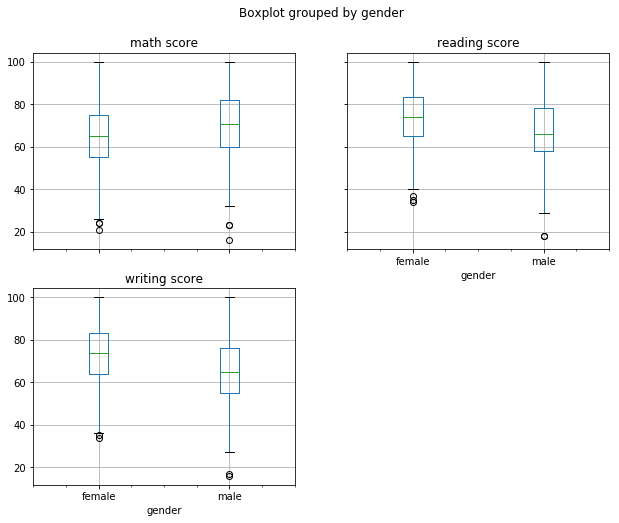

In [23]:
x.boxplot(by='gender',column=['math score','reading score','writing score'],figsize=(10, 8))
plt.show()

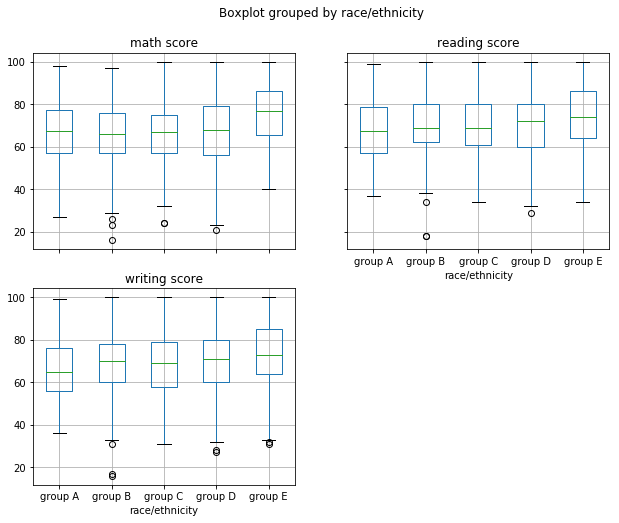

In [24]:
x.boxplot(by='race/ethnicity',column=['math score','reading score','writing score'],figsize=(10, 8))
plt.show()

In [25]:
#7. How is the test preparation affecting the math score. Give a visual representation.
y=list(set(df['test preparation course'].values)) 
#x['test preparation course']=x['test preparation course'].replace(y,[0,1])

plt.scatter(x['test preparation course'],x['math score'])
plt.show()

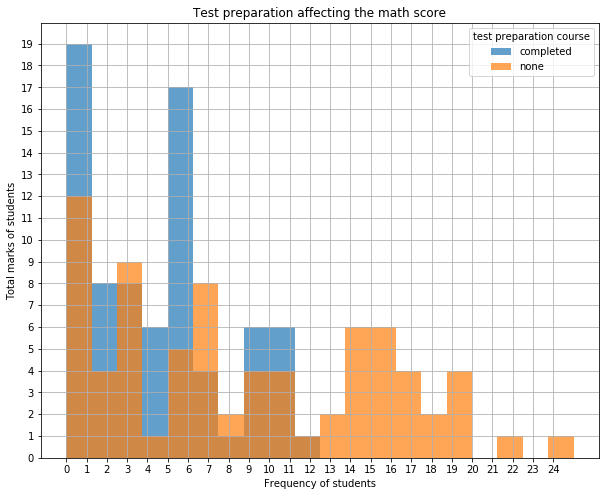

In [29]:
pd.crosstab(df['math score'],df['test preparation course']).plot(kind='hist',alpha=0.7,bins=20,figsize=(10,8))
plt.xticks(np.arange(0, 25, step=1))
plt.yticks(np.arange(0, 20, step=1))
plt.grid(True)
plt.xlabel('Frequency of students')
plt.ylabel('Total marks of students')
plt.title('Test preparation affecting the math score')
plt.show()

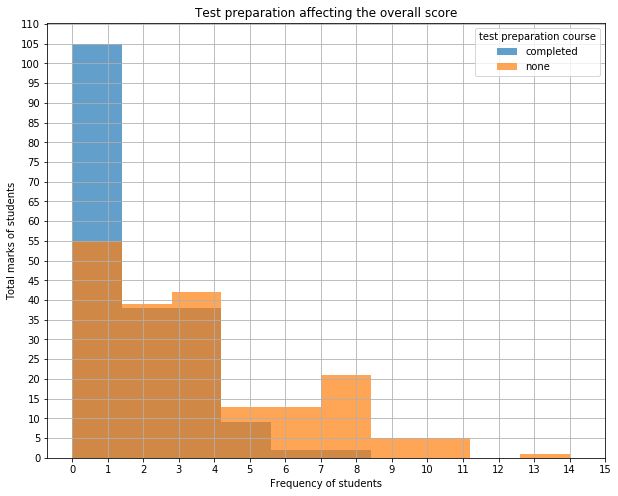

In [28]:
#8. How is the test preparation affecting the overall score. Give a visual representation.
pd.crosstab(df['overall'],df['test preparation course']).plot(kind='hist',alpha=0.7,bins=10,figsize=(10,8))
plt.xticks(np.arange(0, 16, step=1))
plt.yticks(np.arange(0, 115, step=5))
plt.grid(True)
plt.xlabel('Frequency of students')
plt.ylabel('Total marks of students')
plt.title('Test preparation affecting the overall score')
plt.show()

In [35]:
#8. Generate a Linear Regression classifier to predict the oeverall score.
features=df.drop('overall', axis = 1)
for index, feature_name in enumerate(list(features)):
    plt.figure(figsize=(4, 3))
    plt.scatter(d.data[:, index-1], data.overall)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

NameError: name 'd' is not defined